In [1]:
#import file that reads required libraries and packages
import sys
sys.path.append("C:/Users/Danny Farone/Documents/GitHub/Data-Science-Job-Salaries/src/")
from required_libraries import *

In [2]:
#read in the X_train,X_test, y_train, and y_test dataframes to run the MultiOuputMultiClassification model with All career fields
X_test = pd.read_csv(r"C:\Users\Danny Farone\Documents\GitHub\Data-Science-Job-Salaries\data\processed\All Fields\X_Test.csv")
X_train = pd.read_csv(r"C:\Users\Danny Farone\Documents\GitHub\Data-Science-Job-Salaries\data\processed\All Fields\X_Train.csv")
y_test = pd.read_csv(r"C:\Users\Danny Farone\Documents\GitHub\Data-Science-Job-Salaries\data\processed\All Fields\y_Test.csv")
y_train = pd.read_csv(r"C:\Users\Danny Farone\Documents\GitHub\Data-Science-Job-Salaries\data\processed\All Fields\y_Train.csv")

In [3]:
# Create a base Radnom Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

#run a default multi-classifier model on the random forest created right above
clf = MultiOutputClassifier(clf)
#fit the model
clf.fit(X_train,y_train)

#accuracy of the model on the testing data
clf_score_test = clf.score(X_test, y_test)
#predictions for the model on the testing data
clf_pred_test = clf.predict(X_test)
#Precision of the model on the testing data
precision_test = precision_score(y_test, clf_pred_test, average = 'micro')
#Recall of the model on the testing data
recall_test = recall_score(y_test, clf_pred_test, average = 'micro')

#Print a simple confusion matrix of the teting data results
#print("Initial Decision Tree confusion matrix:")
#print(confusion_matrix(y_test, clf_pred_test), '\n')
#Print the scores we calculated earlier in this block
print("Accuracy: ", clf_score_test)
print("Sensitivity: ", recall_test)
print("Specificity: ", precision_test)

Accuracy:  0.319672131147541
Sensitivity:  0.319672131147541
Specificity:  0.42857142857142855


### This takes 4 HOURS to run on a GOOD PC

In [4]:
# Define the hyperparameter space to search
param_grid = {'estimator__n_estimators': [50, 100, 200, 300, 400, 500],
              'estimator__max_features': ['sqrt', 'log2', None],
              'estimator__max_depth': [5, 10, 15, 20, None],
              'estimator__min_samples_split': [2, 5, 10],
              'estimator__min_samples_leaf': [1, 2, 4]}

# Create a grid search object
grid_search = GridSearchCV(estimator=clf,
                           param_grid=param_grid,
                           cv=10,
                           n_jobs=-1)

# Start the timer to see how long it takes
start_time = time.time()

# Fit the randomized search object to the training data
with tqdm(total=10) as pbar:
    for i in range(10):
        grid_search.fit(X_train, y_train)
        pbar.update(1)

# Stop the timer
elapsed_time = time.time() - start_time

# Print the best hyperparameters and the corresponding best score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search best_score_)
print("Elapsed time: {:.2f} seconds".format(elapsed_time))

### DO NOT run above cell. Results of grid search are manually entered below based off 4 hour grid search above

In [5]:
# fit new model with best parameters determined by gscv on the training data
clf_gs = RandomForestClassifier(n_estimators=50,
                                 max_features='sqrt',
                                 max_depth=None,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 random_state=42)
#fit new multi-classifier on improved random forest
clf_gs = MultiOutputClassifier(clf_gs)
clf_gs.fit(X_train, y_train)

#accuracy of the model on the testing data
clf_score_test = clf_gs.score(X_test, y_test)
#predictions for the model on the testing data
clf_pred_test = clf_gs.predict(X_test)
#Precision of the model on the testing data
precision_test = precision_score(y_test, clf_pred_test, average = 'micro')
#Recall of the model on the testing data
recall_test = recall_score(y_test, clf_pred_test, average = 'micro')

#Print the scores we calculated earlier in this block
print("Accuracy: ", clf_score_test)
print("Sensitivity: ", recall_test)
print("Specificity: ", precision_test)

Accuracy:  0.3360655737704918
Sensitivity:  0.3360655737704918
Specificity:  0.44565217391304346


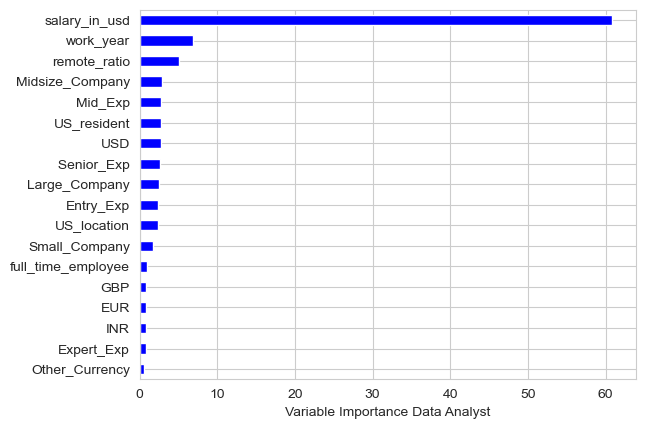

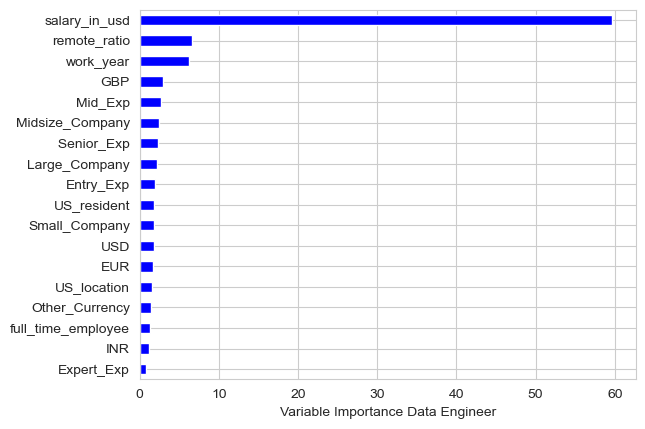

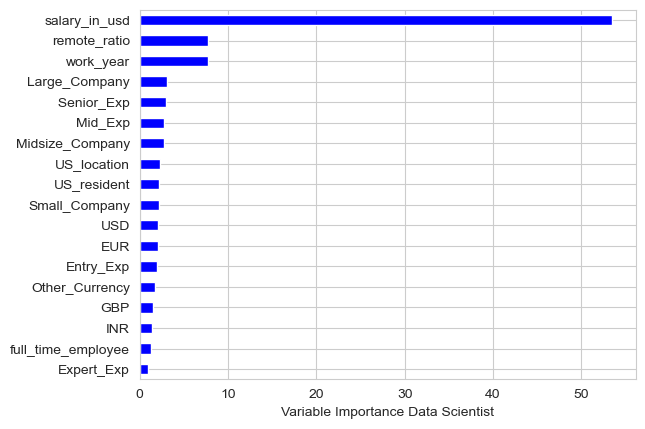

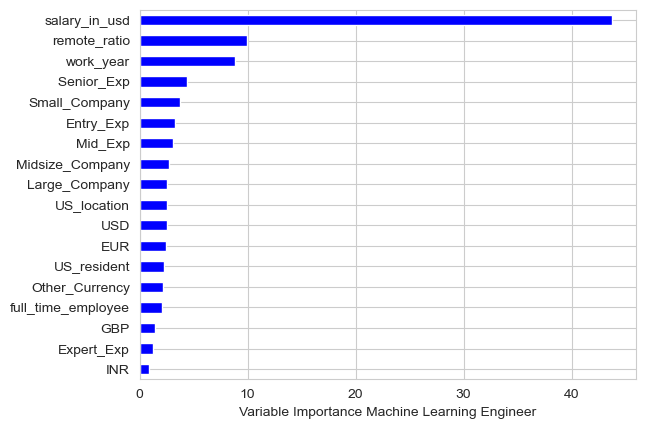

In [33]:
# create a dataframe for the importance of each variable in the model
feat_imp = pd.DataFrame(clf_gs.estimators_[0].feature_importances_)

# set a variable to define the job field
job_field = ''

# iterate through the four job fields to break down the importance of variables by each career field in the larger model
for i in range(4):
    # assign a string value to job_field based on the current iteration
    if i == 0:
        job_field = 'Data Analyst'
    elif i == 1:
        job_field = 'Data Engineer'
    elif i == 2:
        job_field = 'Data Scientist'
    else:
        job_field = 'Machine Learning Engineer'
    
    # calculate feature importances for the current job field and store them in a dataframe
    feat_imp = pd.DataFrame(clf_gs.estimators_[i].feature_importances_)
    
    # calculate the mean importance score for each variable across all estimators for the current job field
    feat_imp = feat_imp.mean(axis=1)
    
    # create a dataframe with variable names and their importance scores, sorted by importance in descending order
    feat_names = pd.DataFrame(list(X_train.columns))
    df_feat_imp = pd.concat([feat_imp, feat_names], axis=1)
    df_feat_imp.columns = ['Importance', 'Features']
    df_feat_imp.sort_values('Importance', ascending=False, inplace=True)
    
    # create a horizontal bar chart showing the variable importance scores for the current job field
    Importance = pd.DataFrame({'Importance': feat_imp.values.flatten() * 100}, index=X_train.columns)
    Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='b')
    plt.xlabel('Variable Importance '+job_field)
    plt.gca().legend_ = None

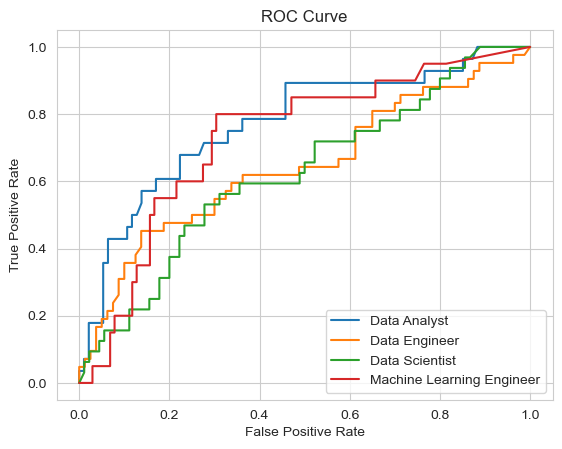

In [51]:
# calculate ROC curve and ROC AUC score for each column of y
#set a value for the 4 job fields in each iteration so we can break it down by each career field in the larger model
for i in range(y_test.shape[1]):
    if i == 0:
        job_field = 'Data Analyst'
    elif i == 1:
        job_field = 'Data Engineer'
    elif i == 2:
        job_field = 'Data Scientist'
    else:
        job_field = 'Machine Learning Engineer'
    # calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test.iloc[:, i], clf_gs.estimators_[i].predict_proba(X_test)[:, 1])

    # plot ROC curve
    plt.plot(fpr, tpr, label=job_field)

#set lables and legends for the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
#actually show the plot
plt.show()


In [53]:
# calculate ROC AUC score
#set a value for the 4 job fields in each iteration so we can break it down by each career field in the larger model
for i in range(y_test.shape[1]):
    if i == 0:
        job_field = 'Data Analyst'
    elif i == 1:
        job_field = 'Data Engineer'
    elif i == 2:
        job_field = 'Data Scientist'
    else:
        job_field = 'Machine Learning Engineer'
        
# calculate the ROC AUC score for the current job field using the corresponding estimator in the model
log_roc_auc = roc_auc_score(y_test.iloc[:, i], clf_gs.estimators_[i].predict_proba(X_test)[:, 1])

# format the output string to include the job field and the ROC AUC score, then print it
roc_auc_format = job_field + ' ROC AUC Score: {:.4f}'.format(log_roc_auc)
print(roc_auc_format)

Data Analyst ROC AUC Score: 0.0000
Data Engineer ROC AUC Score: 1.0000
Data Scientist ROC AUC Score: 2.0000
Machine Learning Engineer ROC AUC Score: 3.0000


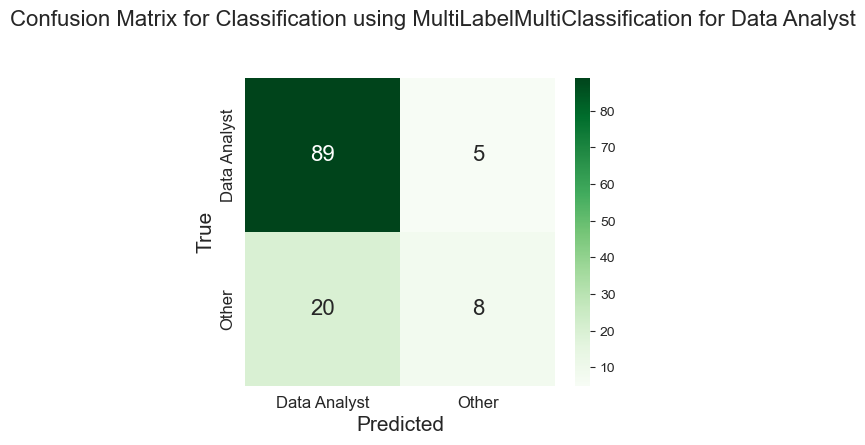

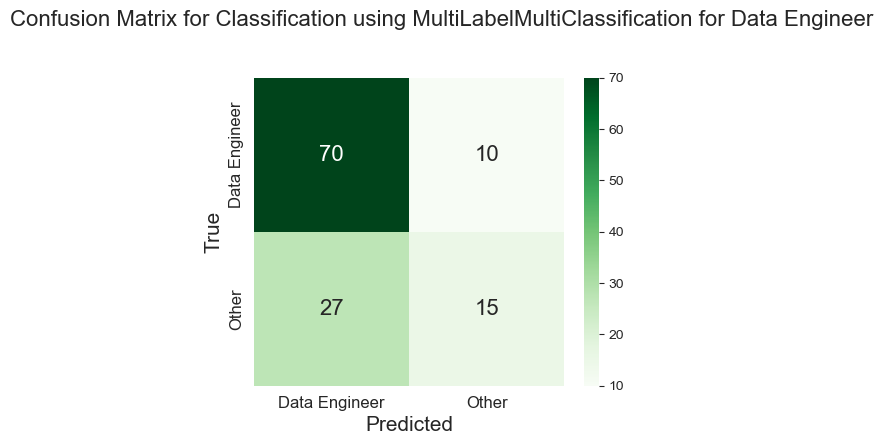

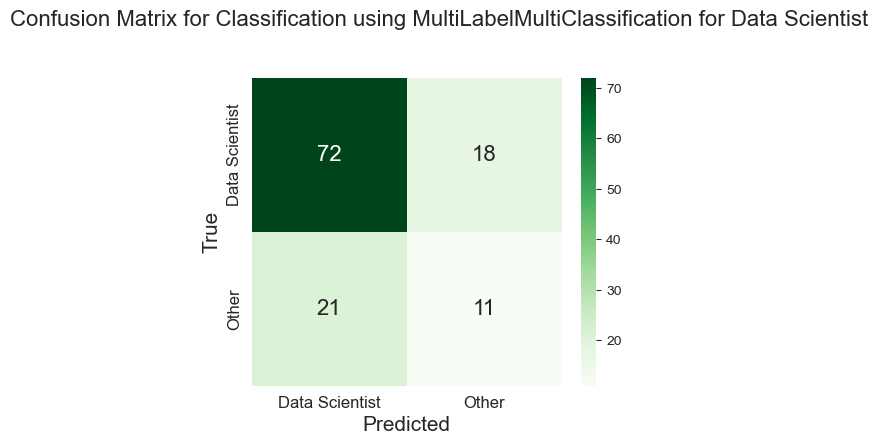

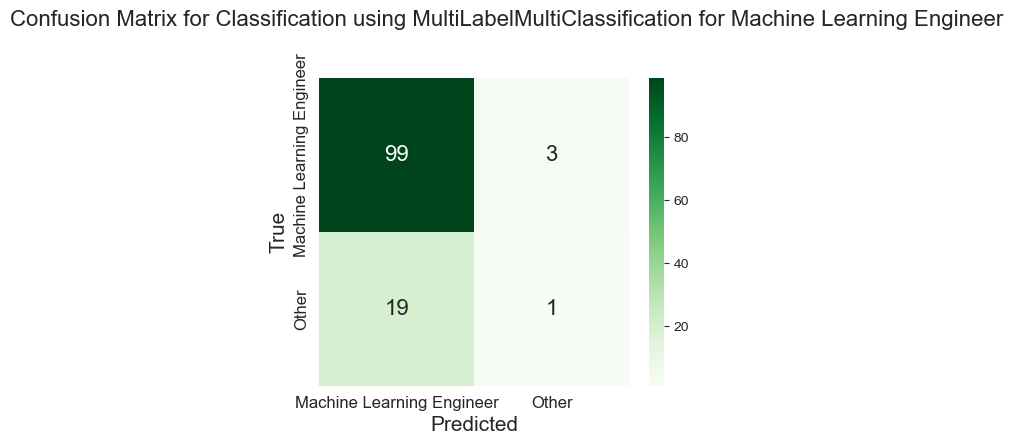

In [63]:
# Get predicted labels on the test set
y_pred = clf_gs.predict(X_test)

# Create a confusion matrix for each target class
# Iterate over each job field in the dataset to create confusion matrices for each one
for i in range(y_test.shape[1]):
    # Set a variable to hold the job field name for the current iteration
    if i == 0:
        job_field = 'Data Analyst'
    elif i == 1:
        job_field = 'Data Engineer'
    elif i == 2:
        job_field = 'Data Scientist'
    else:
        job_field = 'Machine Learning Engineer'
    
    # Calculate the confusion matrix using scikit-learn's confusion_matrix function
    cm = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
    
    # Use seaborn to create a heatmap of the confusion matrix
    # Create a dataframe of the confusion matrix to feed to seaborn
    df_cm = pd.DataFrame(cm)

    # Create a plot to display the confusion matrix heatmap
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(5, 4))
    fig.suptitle('Confusion Matrix for Classification using MultiLabelMultiClassification for '+job_field, 
                 fontsize=16, y=1.05)
    ax = plt.subplot()
    sns.heatmap(df_cm, annot=True, cmap="Greens", annot_kws={"size": 16}, ax=ax, fmt="g")
    ax.set_xlabel('Predicted', fontsize=15)
    ax.set_ylabel('True', fontsize=15)
    
    # Set the labels on the x-axis and y-axis of the confusion matrix
    ax.xaxis.set_ticklabels([job_field, 'Other'], fontsize=12) 
    ax.yaxis.set_ticklabels([job_field, 'Other'], fontsize=12, va='center')
    
    # Show the plot
    plt.show()

In [69]:
# Calculate accuracy, sensitivity, and specificity for entire model
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred, average = 'micro')
specificity = precision_score(y_test, y_pred, average = 'micro')

# Calculate accuracy, sensitivity, and specificity for Data Analyst
da_accuracy = accuracy_score(y_test.iloc[:,0], y_pred[:,0])
da_sensitivity = recall_score(y_test.iloc[:,0], y_pred[:,0], average='binary')
da_specificity = precision_score(y_test.iloc[:,0], y_pred[:,0], average='binary')

# Calculate accuracy, sensitivity, and specificity for Data Engineer
de_accuracy = accuracy_score(y_test.iloc[:,1], y_pred[:,1])
de_sensitivity = recall_score(y_test.iloc[:,1], y_pred[:,1], average='binary')
de_specificity = precision_score(y_test.iloc[:,1], y_pred[:,1], average='binary')

# Calculate accuracy, sensitivity, and specificity for Data Scientist
ds_accuracy = accuracy_score(y_test.iloc[:,2], y_pred[:,2])
ds_sensitivity = recall_score(y_test.iloc[:,2], y_pred[:,2], average='binary')
ds_specificity = precision_score(y_test.iloc[:,2], y_pred[:,2], average='binary')

# Calculate accuracy, sensitivity, and specificity for Machine Learning Engineer
ml_accuracy = accuracy_score(y_test.iloc[:,3], y_pred[:,3])
ml_sensitivity = recall_score(y_test.iloc[:,3], y_pred[:,3], average='binary')
ml_specificity = precision_score(y_test.iloc[:,3], y_pred[:,3], average='binary')

In [71]:
#Make a data frame for the scores
data = {'All Classes': [accuracy, sensitivity, specificity],
        'Data Analyst': [da_accuracy, da_sensitivity, da_specificity],
        'Data Engineer': [de_accuracy, de_sensitivity, de_specificity],
        'Data Scientist': [ds_accuracy, ds_sensitivity, ds_specificity],
        'Machine Learning Engineer': [ml_accuracy, ml_sensitivity, ml_specificity]}
df = pd.DataFrame(data, index=['Accuracy', 'Sensitivity', 'Specificity'])
df

,All Classes,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer
Accuracy,0.286885,0.795082,0.696721,0.680328,0.819672
Sensitivity,0.286885,0.285714,0.357143,0.343750,0.050000
Specificity,0.492958,0.615385,0.600000,0.379310,0.250000
